<a href="https://colab.research.google.com/github/andromeda5/Machine-Learning-with-Python/blob/master/iopex_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

To perform following tasks

1) Apply Suitable Machine Learning Algorithms for given the dateset and find whether there are any abnormal behaviour exist. 

2) Apply Suitable Data Cleaning Techniques for the data set and transform the data.

3) Perform Extensive Exploratory Data Analysis on the dateset and share your findings.

4) Apply Suitable Evaluation Methods for your Machine Learning Model.


In [0]:
#importing 

#data manipulation
import numpy as np
import pandas as pd

#remove warnings
import warnings
warnings.filterwarnings("ignore")

#visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

#clustering
from kmodes.kmodes import KModes

# Analysis/Modeling



In [0]:
df=pd.read_excel("/content/drive/My Drive/Data.xlsx")

In [3]:
df.head()

,Date_Time,IP_Address,Vendor_Name,Type
0,"July 8th 2019, 14:43:03.000",10.1.1.285,Vendor-1,INVOICE
1,"July 8th 2019, 14:43:01.000",10.1.2.389,Vendor-1,INVOICE
2,"July 8th 2019, 14:42:59.000",10.1.1.415,Vendor-1,PRE_APPROVAL
3,"July 8th 2019, 14:42:57.000",10.1.1.79,Vendor-1,PRE_APPROVAL
4,"July 8th 2019, 14:42:55.000",10.1.1.60,Vendor-10,IPC


In [4]:
df.shape

(396220, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396220 entries, 0 to 396219
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date_Time    396220 non-null  object
 1   IP_Address   396191 non-null  object
 2   Vendor_Name  396217 non-null  object
 3   Type         391412 non-null  object
dtypes: object(4)
memory usage: 12.1+ MB


In [6]:
df.describe()

,Date_Time,IP_Address,Vendor_Name,Type
count,396220,396191,396217,391412
unique,396118,386,621,6
top,"July 4th 2019, 09:27:05.000",10.1.1.63,Vendor-775,INVOICE
freq,7,2440,25905,201829


In [7]:
df.isnull().sum()

Date_Time         0
IP_Address       29
Vendor_Name       3
Type           4808
dtype: int64

In [8]:
for i in df.columns:
    a=df[i].nunique()
    print("The Variable {} has {} unique Entries".format(i,a))

The Variable Date_Time has 396118 unique Entries
The Variable IP_Address has 386 unique Entries
The Variable Vendor_Name has 621 unique Entries
The Variable Type has 6 unique Entries


In [0]:
new_df=df.drop_duplicates

In [0]:
# missing value

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df)

Your selected dataframe has 4 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Type,4808,1.2135
IP_Address,29,0.0073
Vendor_Name,3,0.0008


The missing values in three columns is very less and so dropping off the missing rows 

In [0]:
df['Type'].fillna('NA',inplace=True)
df.dropna(inplace=True)

In [13]:
missing_values_table(df)
df.shape

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


(396188, 4)

In [14]:
# Redundancy Check
df.duplicated().sum()

16

In [0]:

df.drop_duplicates(subset=None,keep='first',inplace=True)

In [16]:
df.shape

(396172, 4)

In [0]:
df['Date_Time']= pd.to_datetime(df['Date_Time'])

#Exploratory Data Analysis



In [18]:
df.head()

,Date_Time,IP_Address,Vendor_Name,Type
0,2019-07-08 14:43:03,10.1.1.285,Vendor-1,INVOICE
1,2019-07-08 14:43:01,10.1.2.389,Vendor-1,INVOICE
2,2019-07-08 14:42:59,10.1.1.415,Vendor-1,PRE_APPROVAL
3,2019-07-08 14:42:57,10.1.1.79,Vendor-1,PRE_APPROVAL
4,2019-07-08 14:42:55,10.1.1.60,Vendor-10,IPC


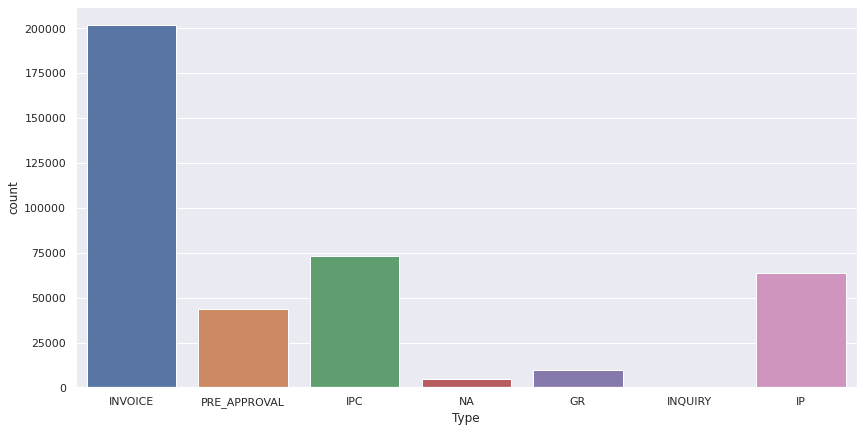

In [19]:
sns.set(style="darkgrid")

plt.figure(figsize=(14,7))
ax = sns.countplot(x='Type',  data=df)
plt.show()

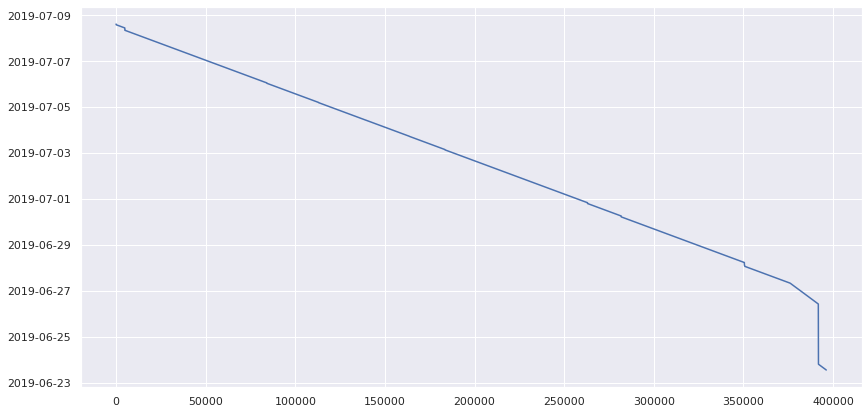

In [36]:

df.Date_Time.plot(figsize=(14,7))
plt.show()

## Clustering

In [0]:
df_new = df[['Vendor_Name','Type']]

In [0]:
for i,name in enumerate(df['Vendor_Name'].unique()):
    df_new[name] = 0 
def set_product(x):
    x[str(x['Vendor_Name'])] = 1
    return x
df_new = df_new.apply(set_product,axis=1)

In [43]:
df_new = df_new.groupby(['Type']).sum()
df_new

,Vendor-1,Vendor-10,Vendor-100,Vendor-101,Vendor-102,Vendor-103,Vendor-104,Vendor-105,Vendor-106,Vendor-107,Vendor-108,Vendor-109,Vendor-11,Vendor-110,Vendor-111,Vendor-112,Vendor-113,Vendor-114,Vendor-115,Vendor-116,Vendor-117,Vendor-118,Vendor-119,Vendor-12,Vendor-120,Vendor-121,Vendor-122,Vendor-123,Vendor-124,Vendor-125,Vendor-126,Vendor-127,Vendor-128,Vendor-129,Vendor-13,Vendor-130,Vendor-131,Vendor-132,Vendor-133,Vendor-134,...,Vendor-197,Vendor-198,Vendor-199,Vendor-2,Vendor-20,Vendor-200,Vendor-201,Vendor-202,Vendor-203,Vendor-204,Vendor-205,Vendor-206,Vendor-207,Vendor-208,Vendor-209,Vendor-21,Vendor-210,Vendor-211,Vendor-212,Vendor-213,Vendor-214,Vendor-215,Vendor-216,Vendor-217,Vendor-218,Vendor-219,Vendor-22,Vendor-220,Vendor-221,Vendor-222,Vendor-223,Vendor-224,Vendor-225,Vendor-226,Vendor-227,Vendor-228,Vendor-229,Vendor-23,Vendor-230,Vendor-231
Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GR,0,0,0,0,0,0,0,12,0,0,0,24,0,0,0,0,0,0,0,72,0,12,0,0,0,960,0,0,636,0,0,0,0,39,0,13,0,0,0,0,...,0,0,0,0,11,0,0,0,55,11,0,0,0,0,0,0,0,22,22,11,0,0,0,0,77,0,0,0,11,0,0,0,0,11,0,0,0,0,143,0
INQUIRY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,...,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,22,0,0,0,0,0,0,0,0,0,0,0,0
INVOICE,24,0,288,348,12,72,0,0,1200,864,276,156,72,0,24,444,504,24,24,84,432,468,2376,408,0,636,732,372,792,0,2457,8177,26,0,91,26,2964,26,104,754,...,88,1155,220,33,44,11,2926,11,99,0,11,0,0,77,0,0,528,22,55,0,44,110,22,77,0,22,0,2332,341,11,572,55,385,11,22,99,154,22,154,22
IP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IPC,0,202,0,0,0,9393,276,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,4524,0,0,0,0,585,0,0,0,0,0,9997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,803,22,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NA,0,0,0,0,0,228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,24,0,0,0,0,0,104,0,0,0,0,0,...,0,11,11,0,0,0,11,0,0,0,0,55,0,0,0,0,11,0,0,0,0,0,0,0,0,0,11,22,22,0,0,0,0,0,0,0,0,0,11,0
PRE_APPROVAL,24,0,0,0,48,12,0,0,12,0,0,0,0,0,0,0,0,672,0,12,12,0,156,0,0,0,180,0,12,0,52,299,0,0,0,0,13,0,0,0,...,0,55,0,0,0,0,33,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,11,0,0,0,0,11,11,0


In [44]:
km = KModes(n_clusters=7,init='Huang',n_init=4,verbose=1)
clusters = km.fit_predict(df_new)
kmodes = km.cluster_centroids_
shape = kmodes.shape
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-style cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in df_new.columns[np.nonzero(cent)]:
            print(j)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0

cluster 0: 
Vendor-10
Vendor-103
Vendor-104
Vendor-110
Vendor-120
Vendor-125
Vendor-130
Vendor-142
Vendor-232
Vendor-256
Vendor-268
Vendor-270
Vendor-276
Vendor-298
Vendor-302
Vendor-303
Vendor-339
Vendor-35
Vendor-39
Vendor-407
Vendor-41
Vendor-416
Vendor-417
Vendor-424
Vendor-426
Vendor-429
Vendor-431
Vendor-438
Vendor-44
Vendor-449
Vendor-458
Vendor-46
Vendor-463
Vendor-477
Vendor-49
Vendor-512
Vendor-514
Vendor-519
Vendor-521
Vendor-528
Vendor-533
Vendor-534
Vendor-535
Vendor-545
Vendor-549
Vendor-550
Vendor-553
Vendor-560
Vendor-561
Vendor-573
Vendor-597
Vendor-7
Vendor-700
Vendor-701
Vendor-702
Vendor-703
Vendor-711
Vendor-712
Vendor-72
Vendor-750
Vendor-751
Vendor-752
Vendor-753
Vendor-755
Vendor-760
Vendor-761
Vendor-775
Vendor-800
Vendor-801
Vendor-802
Vendor-805
Vendor-90
Vendor-900
Vendor-91
Vendor-950
Vendor-97
Vendor-147
Vendor-150
Vendor-151
Vendor-1

In [46]:
x = df_new.reset_index().values
clusters = km.fit_predict(x)
df_new['Clusters'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


In [47]:
df_new

,Vendor-1,Vendor-10,Vendor-100,Vendor-101,Vendor-102,Vendor-103,Vendor-104,Vendor-105,Vendor-106,Vendor-107,Vendor-108,Vendor-109,Vendor-11,Vendor-110,Vendor-111,Vendor-112,Vendor-113,Vendor-114,Vendor-115,Vendor-116,Vendor-117,Vendor-118,Vendor-119,Vendor-12,Vendor-120,Vendor-121,Vendor-122,Vendor-123,Vendor-124,Vendor-125,Vendor-126,Vendor-127,Vendor-128,Vendor-129,Vendor-13,Vendor-130,Vendor-131,Vendor-132,Vendor-133,Vendor-134,...,Vendor-198,Vendor-199,Vendor-2,Vendor-20,Vendor-200,Vendor-201,Vendor-202,Vendor-203,Vendor-204,Vendor-205,Vendor-206,Vendor-207,Vendor-208,Vendor-209,Vendor-21,Vendor-210,Vendor-211,Vendor-212,Vendor-213,Vendor-214,Vendor-215,Vendor-216,Vendor-217,Vendor-218,Vendor-219,Vendor-22,Vendor-220,Vendor-221,Vendor-222,Vendor-223,Vendor-224,Vendor-225,Vendor-226,Vendor-227,Vendor-228,Vendor-229,Vendor-23,Vendor-230,Vendor-231,Clusters
Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GR,0,0,0,0,0,0,0,12,0,0,0,24,0,0,0,0,0,0,0,72,0,12,0,0,0,960,0,0,636,0,0,0,0,39,0,13,0,0,0,0,...,0,0,0,11,0,0,0,55,11,0,0,0,0,0,0,0,22,22,11,0,0,0,0,77,0,0,0,11,0,0,0,0,11,0,0,0,0,143,0,6
INQUIRY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,...,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,22,0,0,0,0,0,0,0,0,0,0,0,0,1
INVOICE,24,0,288,348,12,72,0,0,1200,864,276,156,72,0,24,444,504,24,24,84,432,468,2376,408,0,636,732,372,792,0,2457,8177,26,0,91,26,2964,26,104,754,...,1155,220,33,44,11,2926,11,99,0,11,0,0,77,0,0,528,22,55,0,44,110,22,77,0,22,0,2332,341,11,572,55,385,11,22,99,154,22,154,22,3
IP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
IPC,0,202,0,0,0,9393,276,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,4524,0,0,0,0,585,0,0,0,0,0,9997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,803,22,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
NA,0,0,0,0,0,228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,24,0,0,0,0,0,104,0,0,0,0,0,...,11,11,0,0,0,11,0,0,0,0,55,0,0,0,0,11,0,0,0,0,0,0,0,0,0,11,22,22,0,0,0,0,0,0,0,0,0,11,0,0
PRE_APPROVAL,24,0,0,0,48,12,0,0,12,0,0,0,0,0,0,0,0,672,0,12,12,0,156,0,0,0,180,0,12,0,52,299,0,0,0,0,13,0,0,0,...,55,0,0,0,0,33,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,11,0,0,0,0,11,11,0,4
